In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [10]:
df1=pd.read_csv('data/gemstone.csv')

In [11]:
df=df1.sample(20000)

In [12]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
150773,150773,0.30,Very Good,I,SI1,63.4,58.0,4.25,4.22,2.68,506
2665,2665,0.52,Premium,E,SI2,61.5,59.0,5.12,5.16,3.16,1135
159027,159027,0.32,Premium,D,VVS1,61.6,58.0,4.38,4.34,2.69,914
187083,187083,0.58,Ideal,G,VVS2,60.7,57.0,5.41,5.44,3.30,2415
47509,47509,1.10,Ideal,F,VS1,62.0,54.0,6.69,6.65,4.12,8752
...,...,...,...,...,...,...,...,...,...,...,...
51609,51609,1.10,Very Good,H,SI2,61.8,56.0,6.57,6.63,4.08,4382
153065,153065,0.51,Ideal,D,VS2,61.9,56.0,5.15,5.18,3.19,1848
174043,174043,1.00,Very Good,F,SI1,63.1,61.0,6.34,6.28,3.97,4679
84653,84653,1.00,Very Good,D,SI2,59.7,62.0,6.48,6.54,3.88,4672


In [16]:
df.isnull().sum()  #checking missing values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 150773 to 185708
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       20000 non-null  int64  
 1   carat    20000 non-null  float64
 2   cut      20000 non-null  object 
 3   color    20000 non-null  object 
 4   clarity  20000 non-null  object 
 5   depth    20000 non-null  float64
 6   table    20000 non-null  float64
 7   x        20000 non-null  float64
 8   y        20000 non-null  float64
 9   z        20000 non-null  float64
 10  price    20000 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.8+ MB


In [18]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
150773,150773,0.30,Very Good,I,SI1,63.4,58.0,4.25,4.22,2.68,506
2665,2665,0.52,Premium,E,SI2,61.5,59.0,5.12,5.16,3.16,1135
159027,159027,0.32,Premium,D,VVS1,61.6,58.0,4.38,4.34,2.69,914
187083,187083,0.58,Ideal,G,VVS2,60.7,57.0,5.41,5.44,3.30,2415
47509,47509,1.10,Ideal,F,VS1,62.0,54.0,6.69,6.65,4.12,8752


In [19]:
df=df.drop(labels=['id'],axis=1) #dropping 'id' column

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
150773,0.30,Very Good,I,SI1,63.4,58.0,4.25,4.22,2.68,506
2665,0.52,Premium,E,SI2,61.5,59.0,5.12,5.16,3.16,1135
159027,0.32,Premium,D,VVS1,61.6,58.0,4.38,4.34,2.69,914
187083,0.58,Ideal,G,VVS2,60.7,57.0,5.41,5.44,3.30,2415
47509,1.10,Ideal,F,VS1,62.0,54.0,6.69,6.65,4.12,8752


In [21]:
df.duplicated()

150773    False
2665      False
159027    False
187083    False
47509     False
          ...  
51609     False
153065    False
174043    False
84653     False
185708    False
Length: 20000, dtype: bool

In [22]:
df.duplicated().sum()

0

In [23]:
#segregating numerical and categorical data
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [24]:
df[categorical_columns].describe()

,cut,color,clarity
count,20000,20000,20000
unique,5,7,8
top,Ideal,G,SI1
freq,9524,4573,5457


In [25]:
df['cut'].value_counts()

cut
Ideal        9524
Premium      5182
Very Good    3863
Good         1243
Fair          188
Name: count, dtype: int64

In [26]:
df['color'].value_counts()

color
G    4573
E    3640
F    3594
H    3108
D    2548
I    1868
J     669
Name: count, dtype: int64

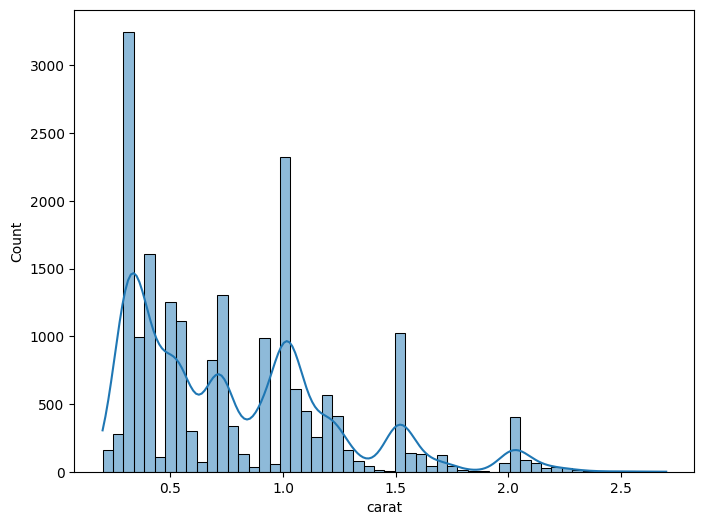

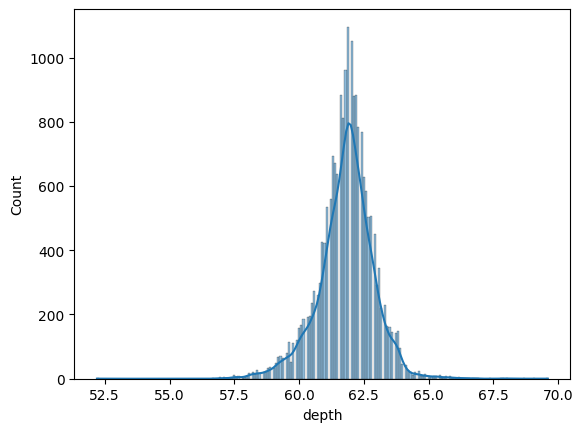

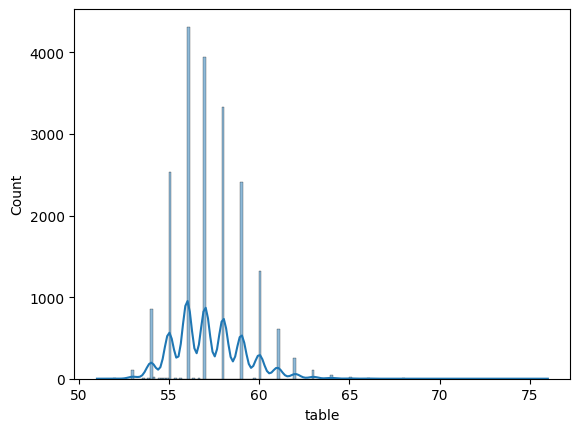

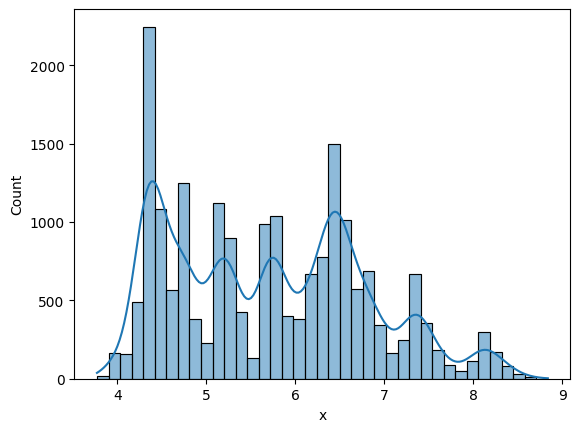

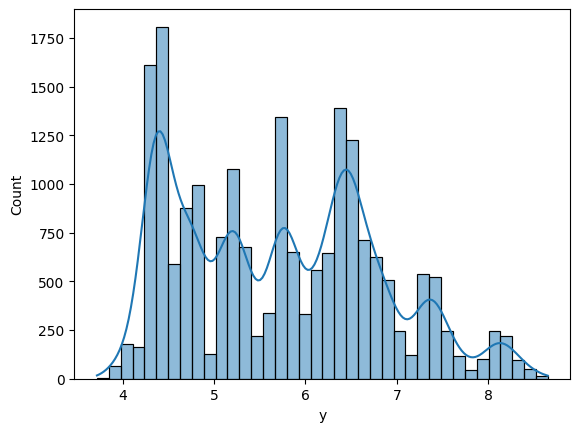

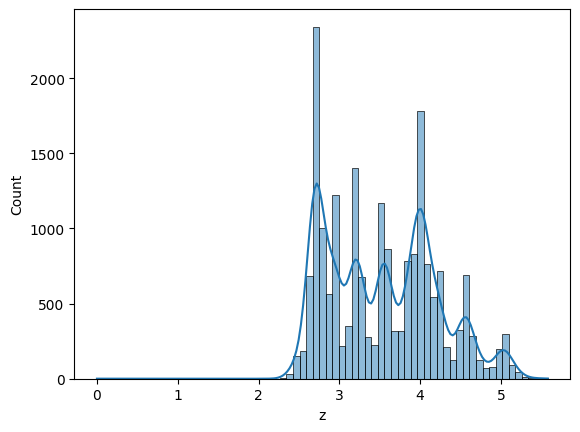

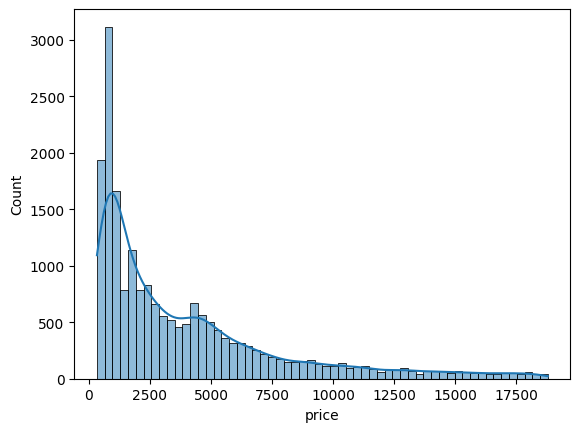

In [30]:
plt.figure(figsize=(8,6))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

<Axes: >

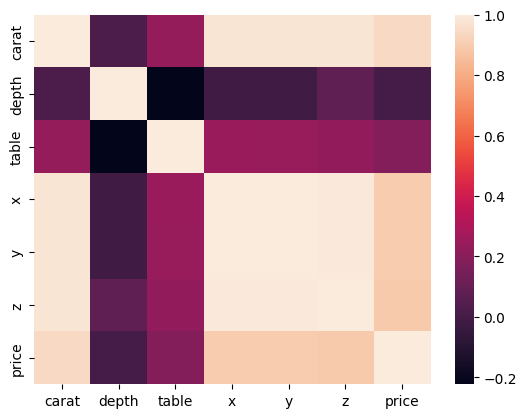

In [38]:
sns.heatmap(df[numerical_columns].corr())   #for checking correlation in numerical columns

<Axes: >

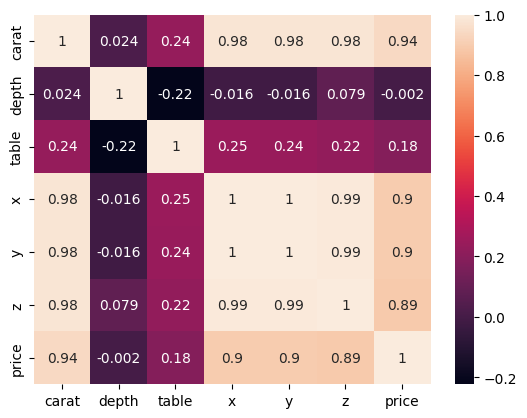

In [39]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

### by analysing above diagram we can conclude x,y,z are highly correlated to each other

c:\gemstoneprediction\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


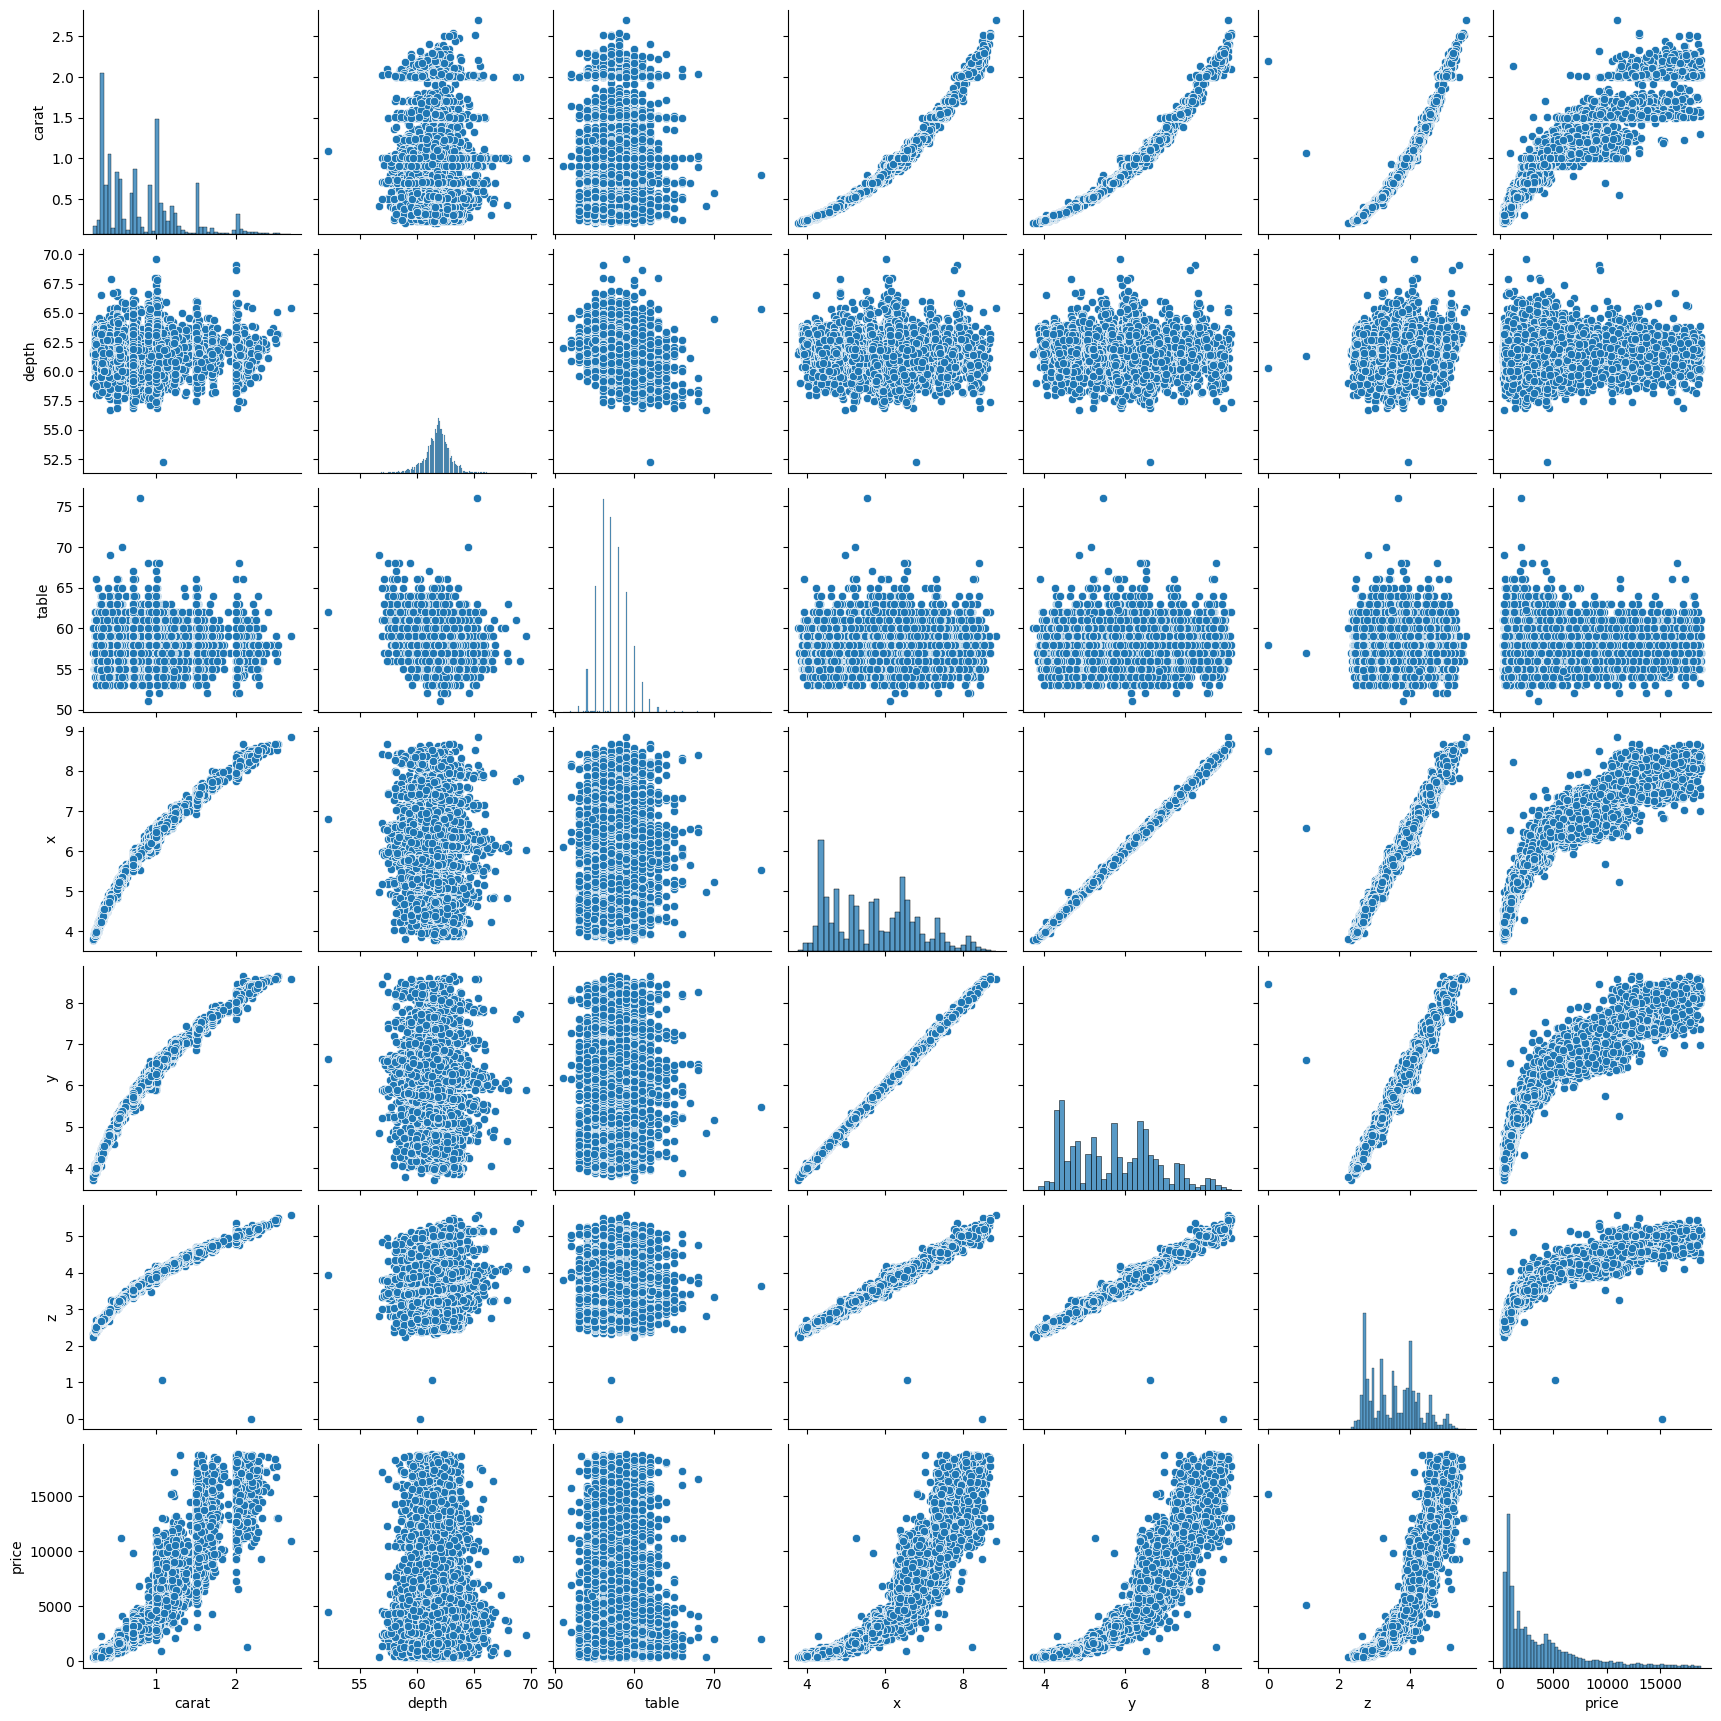

In [40]:
sns.pairplot(df)

In [41]:
# from above graphs we can conclude there is a positive correlation 

In [42]:
df['cut'].unique()

array(['Very Good', 'Premium', 'Ideal', 'Good', 'Fair'], dtype=object)

### #converting categorical data into numerical

In [44]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}  

In [45]:
df['clarity'].unique()

array(['SI1', 'SI2', 'VVS1', 'VVS2', 'VS1', 'VS2', 'IF', 'I1'],
      dtype=object)

In [46]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [47]:
df['color'].unique()

array(['I', 'E', 'D', 'G', 'F', 'H', 'J'], dtype=object)

In [48]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [49]:
df['cut']=df['cut'].replace(cut_map)

In [50]:
df['color']=df['color'].replace(color_map)

In [51]:
df['clarity']=df['clarity'].replace(clarity_map)

In [52]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
150773,0.30,3,6,3,63.4,58.0,4.25,4.22,2.68,506
2665,0.52,4,2,2,61.5,59.0,5.12,5.16,3.16,1135
159027,0.32,4,1,7,61.6,58.0,4.38,4.34,2.69,914
187083,0.58,5,4,6,60.7,57.0,5.41,5.44,3.30,2415
47509,1.10,5,3,5,62.0,54.0,6.69,6.65,4.12,8752
